In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns

In [6]:
df = pd.read_csv('/Users/jacksonsorenson/Documents/Pyhton Projects/Seagate Revenue Optimization/Cleaned CSV/cleaned_supply_chain_data.csv')
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Inspection results,Defect rates,Transportation modes,Routes,Costs,Profit Margin,Stock Coverage,High Defect Rate,Transportation Efficiency,Price Tier
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Pending,0.226410,Road,Route B,187.752075,8474.244717,0.604167,1,553.385988,High
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Pending,4.854068,Road,Route B,503.065579,6957.834486,1.432432,1,553.385988,Low
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Pending,4.580593,Air,Route C,141.920282,9435.829344,0.011364,1,561.712596,Low
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Fail,4.746649,Rail,Route A,254.776159,7512.060266,0.389831,1,541.747556,Medium
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Fail,3.145580,Air,Route A,923.440632,1763.064520,0.089286,1,561.712596,Low


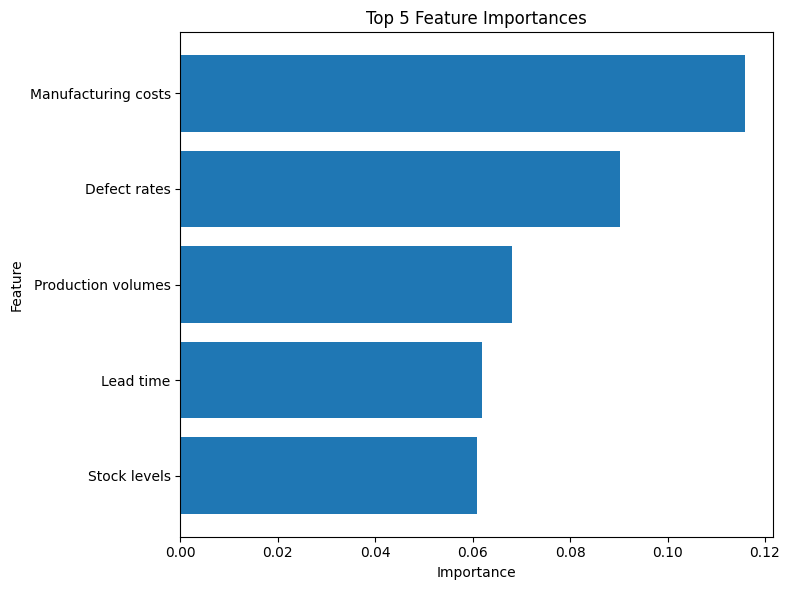

,Feature,Importance
11,Manufacturing costs,0.115880
12,Defect rates,0.090183
9,Production volumes,0.068167
8,Lead time,0.061977
3,Stock levels,0.060921


In [7]:
# Select target and features
target_column = 'Revenue generated'
excluded_columns = ['Profit Margin', target_column, 'SKU']  # Exclude Profit Margin and non-relevant columns
categorical_columns = ['Product type', 'Customer demographics', 'Shipping carriers', 'Supplier name', 
                       'Location', 'Inspection results', 'Transportation modes', 'Routes', 'Price Tier']
numerical_columns = [col for col in df.columns if col not in categorical_columns + excluded_columns]

# Split dataset into features and target
X = df[categorical_columns + numerical_columns]
y = df[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

# Create pipeline with Random Forest Regressor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42, n_estimators=100))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Get feature importances
model = pipeline.named_steps['model']
encoded_features = (
    numerical_columns +
    list(pipeline.named_steps['preprocessor']
         .transformers_[1][1]  # Access OneHotEncoder
         .get_feature_names_out(categorical_columns))
)
importances = model.feature_importances_

# Display feature importances
feature_importances = pd.DataFrame({'Feature': encoded_features, 'Importance': importances})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Get top 5 features
top_features = feature_importances.head(5)

plt.figure(figsize=(8, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.gca().invert_yaxis()
plt.title('Top 5 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
top_features


              count      mean       std       min       25%       50%  \
Product type                                                            
cosmetics      26.0  1.919287  1.461847  0.018608  0.616496  1.668804   
haircare       34.0  2.483150  1.391301  0.165872  1.716822  2.494973   
skincare       40.0  2.334681  1.512467  0.021170  1.207976  2.086992   

                   75%       max  
Product type                      
cosmetics     2.938137  4.754801  
haircare      3.680635  4.843457  
skincare      3.636245  4.939255  


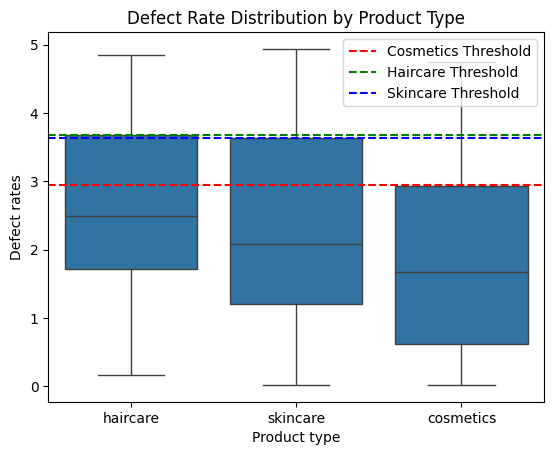

In [16]:
# Defect rate distribution per product

historical_defect_rates = df.groupby('Product type')['Defect rates'].describe()
print(historical_defect_rates)

sns.boxplot(x='Product type', y='Defect rates', data=df)
plt.axhline(y=2.94, color='r', linestyle='--', label='Cosmetics Threshold')
plt.axhline(y=3.68, color='g', linestyle='--', label='Haircare Threshold')
plt.axhline(y=3.64, color='b', linestyle='--', label='Skincare Threshold')
plt.legend()
plt.title('Defect Rate Distribution by Product Type')
plt.show()



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:39:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:39:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:39:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:39:11] WARNING: /Users/runner/work/xgboost/xgboost/src

Confusion Matrix:
 [[9 5]
 [5 9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.64      0.64        14
           1       0.64      0.64      0.64        14

    accuracy                           0.64        28
   macro avg       0.64      0.64      0.64        28
weighted avg       0.64      0.64      0.64        28


ROC AUC Score: 0.7091836734693877

Top Features:
                               Feature  Importance
24   cat__Shipping carriers_Carrier A    0.056208
25   cat__Shipping carriers_Carrier B    0.053220
33              cat__Location_Chennai    0.045456
17        cat__Product type_cosmetics    0.041495
32            cat__Location_Bangalore    0.038582
41     cat__Transportation modes_Rail    0.037315
37       cat__Inspection results_Fail    0.032360
21    cat__Customer demographics_Male    0.032281
20  cat__Customer demographics_Female    0.031669
13                         num__Costs    0.031385


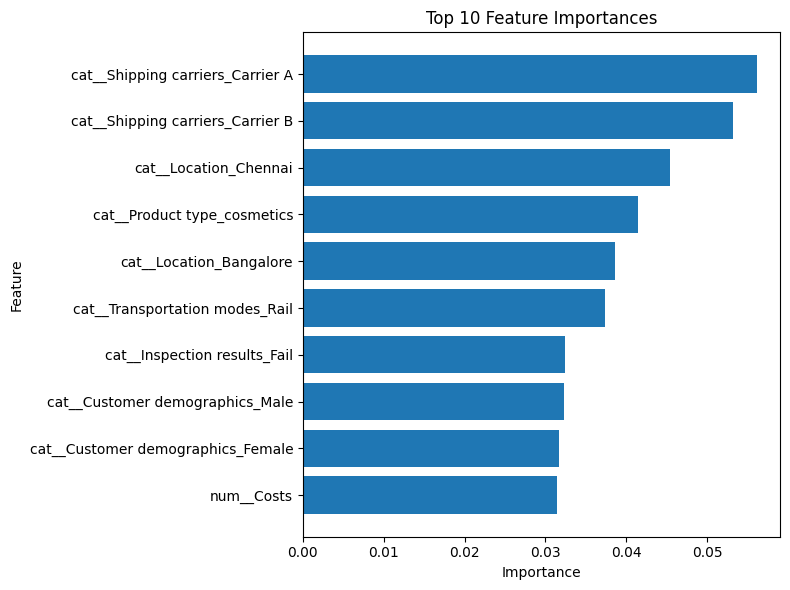

In [9]:
# Feature importance with gradient boost to see what contributes to defect rate

# Define target and features
threshold = 3.0  
df['High_Defect_Rate'] = (df['Defect rates'] > threshold).astype(int)

target_column = 'High_Defect_Rate'
excluded_columns = ['Defect rates', target_column, 'SKU', 'High Defect Rate'] 
categorical_columns = ['Product type', 'Customer demographics', 'Shipping carriers', 'Supplier name', 
                       'Location', 'Inspection results', 'Transportation modes', 'Routes', 'Price Tier']
numerical_columns = [col for col in df.columns if col not in categorical_columns + excluded_columns]

X = df[categorical_columns + numerical_columns]
y = df[target_column]

# Preprocess categorical data before SMOTE
preprocessor_before_smote = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ]
)

X_preprocessed = preprocessor_before_smote.fit_transform(X)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_preprocessed, y)

# Train-test split (on resampled data)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# XGBoost model with hyperparameter tuning
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Updated Hyperparameter Grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Feature importances
feature_names = preprocessor_before_smote.get_feature_names_out()
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop Features:\n", feature_importances.head(10))

# Plot top 10 feature importances
import matplotlib.pyplot as plt

top_features = feature_importances.head(10)
plt.figure(figsize=(8, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.gca().invert_yaxis()
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [10]:
# Calculate the average defect rate per category
category_aggregates = df.groupby('Product type').agg(
    Total_Defects=('Defect rates', 'sum'),
    Total_Products_Sold=('Number of products sold', 'sum')
).reset_index()
category_aggregates['Average Defect Rate per Category'] = (
    category_aggregates['Total_Defects'] / (category_aggregates['Total_Products_Sold'] + 1e-6)
)

print(category_aggregates)

  Product type  Total_Defects  Total_Products_Sold  \
0    cosmetics      49.901461                11757   
1     haircare      84.427107                13611   
2     skincare      93.387231                20731   

   Average Defect Rate per Category  
0                          0.004244  
1                          0.006203  
2                          0.004505  



Top 10 Features Affecting Defect Rates for Cosmetics (Using Gradient Descent):
                                Feature  Importance
44         remainder__High_Defect_Rate    0.950185
20       cat__Transportation modes_Air    0.627192
0    cat__Customer demographics_Female    0.566090
18        cat__Inspection results_Pass    0.549360
21      cat__Transportation modes_Rail    0.465789
8        cat__Supplier name_Supplier 2    0.460805
7        cat__Supplier name_Supplier 1    0.438291
19     cat__Inspection results_Pending    0.421807
26                 cat__Routes_Route C    0.394093
3   cat__Customer demographics_Unknown    0.375744


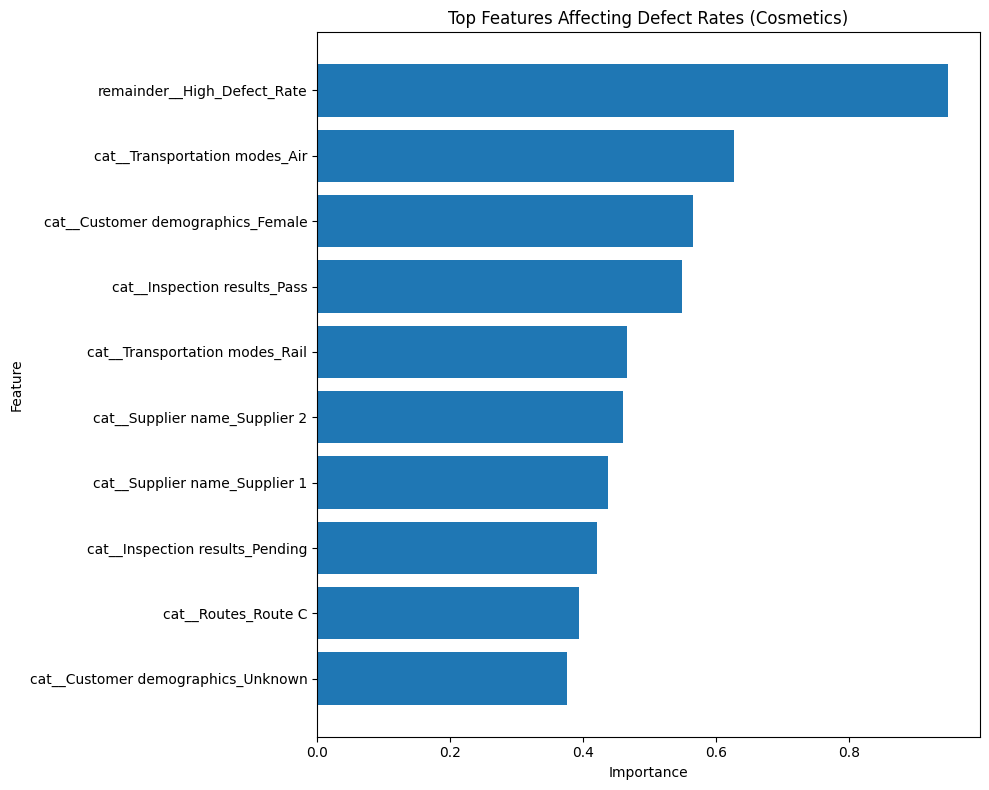

In [11]:
# Gradient Descent feature importance for defect rate (cosmetics)


from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Explicitly drop bias-inducing columns
excluded_columns = ['High Defect Rate', 'Defect Rate per Product', 'Average Defect Rate per Product', 'Price Tier']
df = df.drop(columns=excluded_columns, errors='ignore')

# Filter data for cosmetics
cosmetics_data = df[df['Product type'] == 'cosmetics']

# Define features and target
excluded_columns = ['Defect rates', 'SKU', 'Product type']  # Exclude target and unnecessary columns
X = cosmetics_data.drop(columns=excluded_columns, errors='ignore')  # Drop columns
y = cosmetics_data['Defect rates']  # Use defect rates as the target

# Preprocess categorical features
categorical_columns = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)

# Preprocess the data
X_processed = preprocessor.fit_transform(X)

# Train a Linear Regression model (using Gradient Descent)
lr = LinearRegression()
lr.fit(X_processed, y)

# Get feature importances (coefficients)
feature_names = preprocessor.get_feature_names_out()
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': abs(lr.coef_)  # Use absolute values for feature importance
}).sort_values(by='Importance', ascending=False)

# Display Top 10 Features
print("\nTop 10 Features Affecting Defect Rates for Cosmetics (Using Gradient Descent):\n", 
      feature_importances.head(10))

# Plot Top 10 Features
top_features = feature_importances.head(10)
plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.gca().invert_yaxis()
plt.title('Top Features Affecting Defect Rates (Cosmetics)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



Top 10 Features Affecting Defect Rates for Skincare (Using Gradient Descent):
                              Feature  Importance
44       remainder__High_Defect_Rate    2.812490
14               cat__Location_Delhi    1.917454
12           cat__Location_Bangalore    1.700181
8      cat__Supplier name_Supplier 2    1.533368
9      cat__Supplier name_Supplier 3    1.481838
10     cat__Supplier name_Supplier 4    1.118915
15             cat__Location_Kolkata    0.992572
18      cat__Inspection results_Pass    0.950389
22    cat__Transportation modes_Road    0.895854
6   cat__Shipping carriers_Carrier C    0.861520


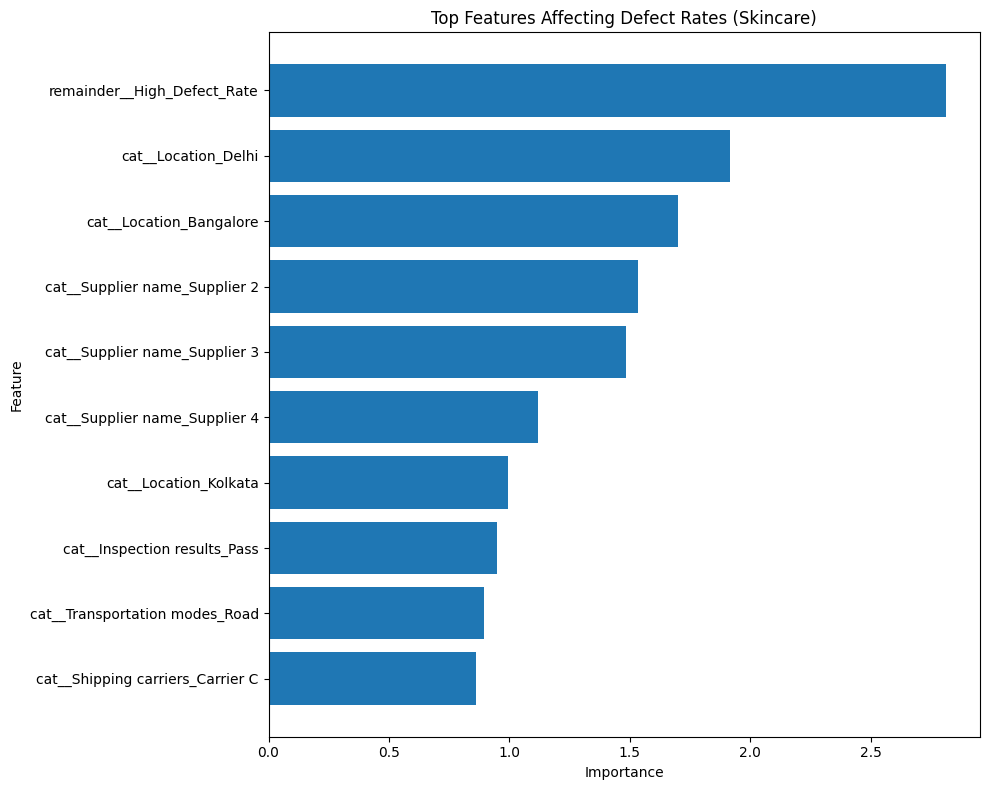

In [12]:
# Gradient Descent feature importance for defect rate (skincare)


# Explicitly drop bias-inducing columns
excluded_columns = ['High Defect Rate', 'Defect Rate per Product', 'Average Defect Rate per Product', 'Price Tier']
df = df.drop(columns=excluded_columns, errors='ignore')

# Filter data for skincare
skincare_data = df[df['Product type'] == 'skincare']

# Define features and target
excluded_columns = ['Defect rates', 'SKU', 'Product type']  # Exclude target and unnecessary columns
X = skincare_data.drop(columns=excluded_columns, errors='ignore')  # Drop columns
y = skincare_data['Defect rates']  # Use defect rates as the target

# Preprocess categorical features
categorical_columns = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)

# Preprocess the data
X_processed = preprocessor.fit_transform(X)

# Train a Linear Regression model (using Gradient Descent)
lr = LinearRegression()
lr.fit(X_processed, y)

# Get feature importances (coefficients)
feature_names = preprocessor.get_feature_names_out()
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': abs(lr.coef_)  # Use absolute values for feature importance
}).sort_values(by='Importance', ascending=False)

# Display Top 10 Features
print("\nTop 10 Features Affecting Defect Rates for Skincare (Using Gradient Descent):\n", 
      feature_importances.head(10))

# Plot Top 10 Features
top_features = feature_importances.head(10)
plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.gca().invert_yaxis()
plt.title('Top Features Affecting Defect Rates (Skincare)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



Top 10 Features Affecting Defect Rates for Haircare (Using Gradient Descent):
                                Feature  Importance
15               cat__Location_Kolkata    2.832306
0    cat__Customer demographics_Female    2.514157
12             cat__Location_Bangalore    2.112860
22      cat__Transportation modes_Road    1.923328
6     cat__Shipping carriers_Carrier C    1.690513
3   cat__Customer demographics_Unknown    1.547922
18        cat__Inspection results_Pass    1.493248
25                 cat__Routes_Route B    1.432076
21      cat__Transportation modes_Rail    1.377746
10       cat__Supplier name_Supplier 4    1.362443


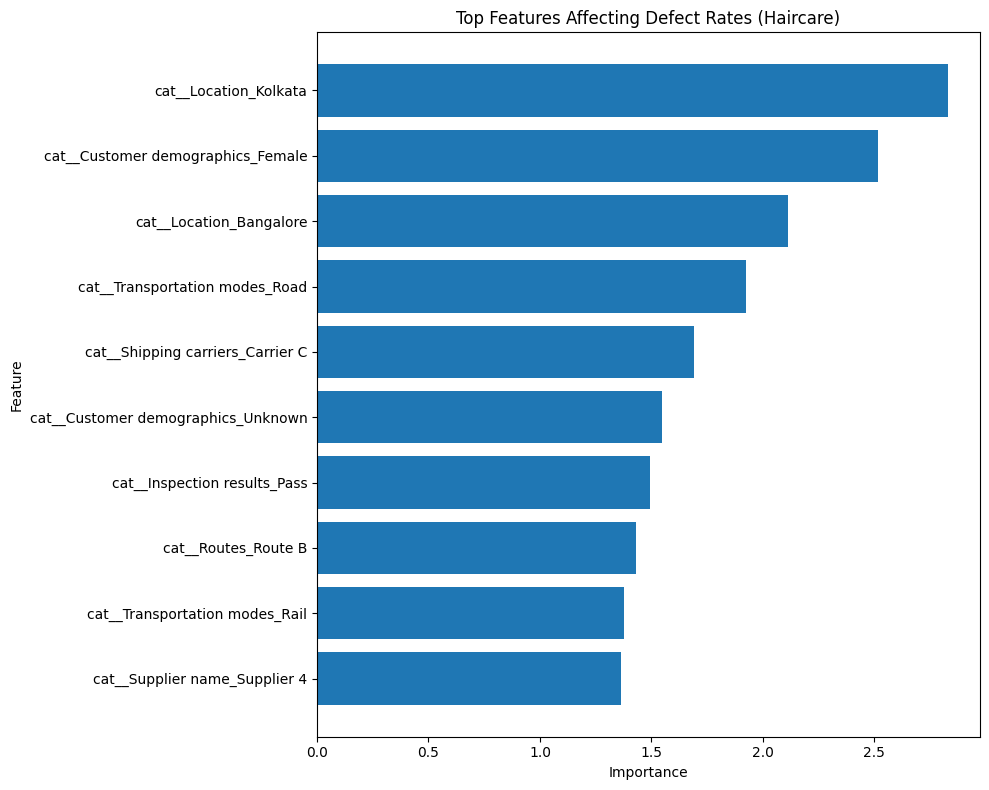

In [13]:
# Gradient Descent feature importance for defect rate (haircare)

# Explicitly drop bias-inducing columns
excluded_columns = ['High Defect Rate', 'Defect Rate per Product', 'Average Defect Rate per Product', 'Price Tier']
df = df.drop(columns=excluded_columns, errors='ignore')

# Filter data for haircare
haircare_data = df[df['Product type'] == 'haircare']

# Define features and target
excluded_columns = ['Defect rates', 'SKU', 'Product type']  # Exclude target and unnecessary columns
X = haircare_data.drop(columns=excluded_columns, errors='ignore')  # Drop columns
y = haircare_data['Defect rates']  # Use defect rates as the target

# Preprocess categorical features
categorical_columns = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)

# Preprocess the data
X_processed = preprocessor.fit_transform(X)

# Train a Linear Regression model (using Gradient Descent)
lr = LinearRegression()
lr.fit(X_processed, y)

# Get feature importances (coefficients)
feature_names = preprocessor.get_feature_names_out()
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': abs(lr.coef_)  # Use absolute values for feature importance
}).sort_values(by='Importance', ascending=False)

# Display Top 10 Features
print("\nTop 10 Features Affecting Defect Rates for Haircare (Using Gradient Descent):\n", 
      feature_importances.head(10))

# Plot Top 10 Features
top_features = feature_importances.head(10)
plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.gca().invert_yaxis()
plt.title('Top Features Affecting Defect Rates (Haircare)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


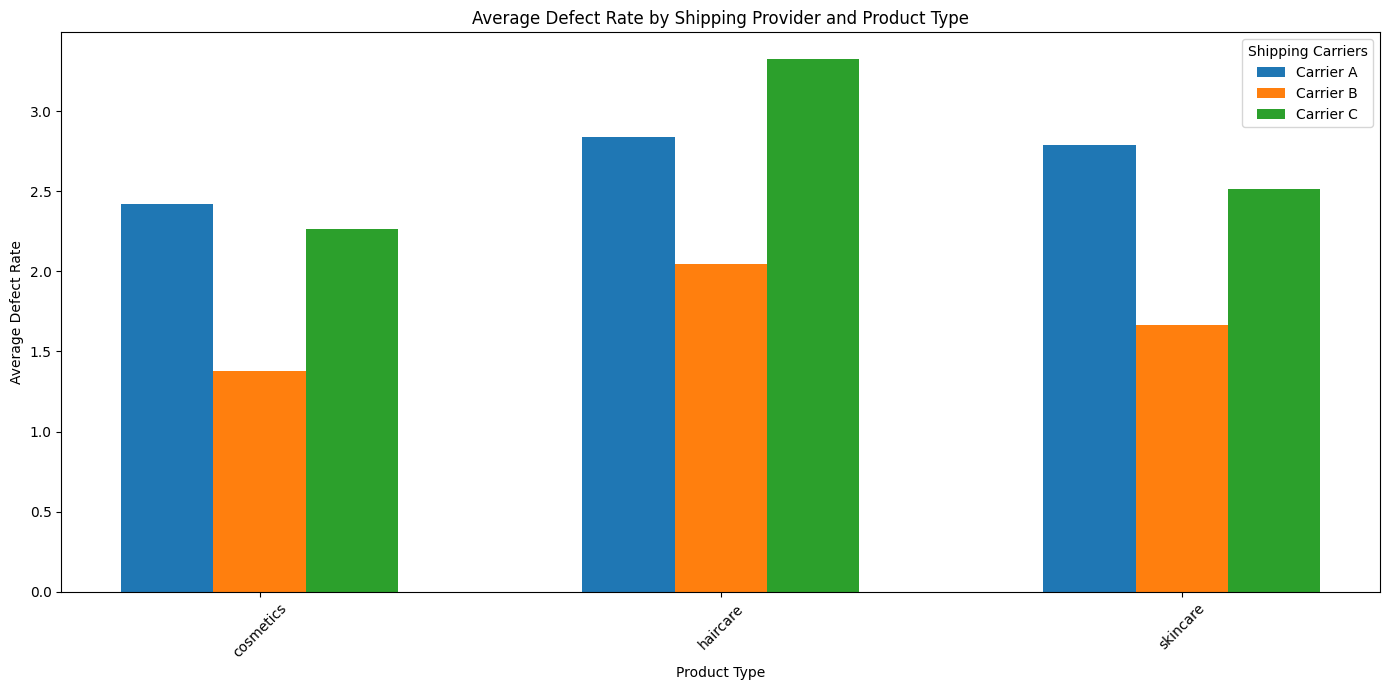

In [31]:
#Average Defect rate by shipping provuder and product type

# Group data by 'Shipping carriers' and 'Product type' to calculate defect rates
defect_rate_grouped = df.groupby(['Shipping carriers', 'Product type'])['Defect rates'].mean()

# Convert the result to a DataFrame for visualization
defect_rate_grouped_df = defect_rate_grouped.reset_index()
defect_rate_grouped_df.rename(columns={'Defect rates': 'Average Defect Rate'}, inplace=True)

# Prepare data for side-by-side bar plot
product_types = defect_rate_grouped_df['Product type'].unique()
shipping_carriers = defect_rate_grouped_df['Shipping carriers'].unique()

x = np.arange(len(product_types))  # the label locations
width = 0.2  # the width of the bars

plt.figure(figsize=(14, 7))

# Generate bars for each shipping carrier
for i, carrier in enumerate(shipping_carriers):
    carrier_data = defect_rate_grouped_df[defect_rate_grouped_df['Shipping carriers'] == carrier]
    defect_rates = [carrier_data[carrier_data['Product type'] == pt]['Average Defect Rate'].values[0] 
                    if pt in carrier_data['Product type'].values else 0 
                    for pt in product_types]
    plt.bar(x + i * width, defect_rates, width, label=carrier)

plt.title('Average Defect Rate by Shipping Provider and Product Type')
plt.xlabel('Product Type')
plt.ylabel('Average Defect Rate')
plt.xticks(x + width * (len(shipping_carriers) - 1) / 2, product_types, rotation=45)
plt.legend(title='Shipping Carriers')
plt.tight_layout()

plt.show()
